In [19]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [20]:
def fill_holes(im: np.ndarray, starting_points: list, num_iterations: int) -> np.ndarray:
    plt.imshow(im)
    plt.show()
    """
        A function that takes a binary image (im),  and a set of points 
        indicating position of holes, and fills the holes.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
            starting_points: list of list containing starting points (row, col). Ex:
                [[row1, col1], [row2, col2], ...]
            num_iterations: integer defining the number of iterations to apply the 
                            hole filling algorithm
        return:
            (np.ndarray) of shape (H, W). dtype=np.bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)
    X0 = np.zeros_like(im, int)
    for row, column in starting_points:
        X0[row, column] = 1
    for k in range(1,num_iterations):
        #TODO
        X_1_B = skimage.morphology.binary_dilation(X0, structuring_element)
        Ic = ~im # using bitwise complement
        X0 = X_1_B & Ic #using bitwise AND #X0 is hopefully Xk for instances after 0
                
    result = X0.copy()
    return result | im
    ### END YOUR CODE HERE ###

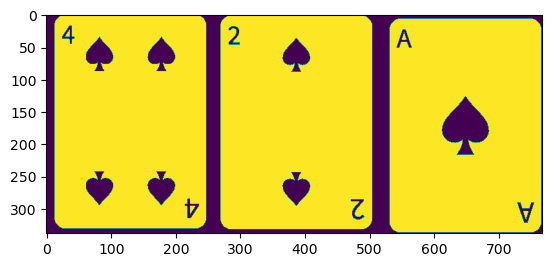

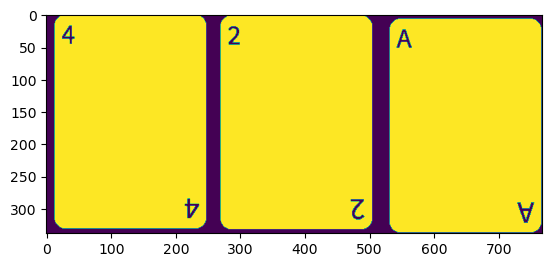

Saving image to: image_processed/cards-filled.png


In [21]:
if __name__ == "__main__":
    im = io.imread('images/cards.png', as_gray=True)
    binary_image = im != 0
    starting_points = [ 
        # (row, column)
        [50, 80],
        [275, 80],
        [50, 175],
        [275, 175],
        [50,390],
        [275, 390],
        [175,650]
    ]
    num_iterations = 50

    result = fill_holes(binary_image, starting_points, num_iterations)

    assert im.shape == result.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, result.shape)
    assert result.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            result.dtype)

    result = utils.to_uint8(result)

    utils.save_im("cards-filled.png", result)